# Notebook che confronta i dataset Cicids2017 e Ciciot2023

This notebook compares the Cicids2017 and Ciciot2023 datasets, which are two datasets that contain network traffic data. The goal is to see if the two datasets contain the same classes and if the classes are balanced. 
The notebook also balances the classes in the datasets.

## Cicids2017

Import the necessary libraries

In [9]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

Load the dataset from disk and remove the rows with missing values and infinity values

In [10]:
file_name1 = "C:/Users/diges/Desktop/dataset/cicids/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
df1 = pd.read_csv(file_name1)
labels = {"Web Attack � Brute Force": "Web Attack-Brute Force" , "Web Attack � XSS": "Web Attack-XSS", "Web Attack � Sql Injection": "Web Attack-Sql Injection"}
for label in labels:
    df1[' Label'] = df1[' Label'].replace(label, labels[label])
df1.to_csv(file_name1, index=False)

# load the datset
directory = "C:/Users/diges/Desktop/dataset/cicids"
file_path = []

# search for all the csv files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path.append(os.path.join(directory, filename))

# create a dataframe for each csv file
df = []
for file in file_path:
    df.append(pd.read_csv(file))

# concatenate all the dataframes
dataframe = pd.concat(df, ignore_index=True)  # ignore_index=True is needed to reset the index of the dataframe

# rename the label column to label
dataframe = dataframe.rename(columns={' Label': 'label'})

# remove the rows with missing values
dataframe = dataframe.dropna()

# remove infinity values
dataframe = dataframe.replace([np.inf, -np.inf], np.nan)
dataframe = dataframe.dropna()

Print the first 5 rows of the dataframe, shape of the dataframe, and the columns of the dataframe

In [11]:
# print the first 5 rows of the dataframe
print(dataframe.head())

    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

In [12]:
# print the shape of the dataframe
print(dataframe.shape)

(2827876, 79)


In [13]:
# print the columns of the dataframe
print(dataframe.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

Plot the histogram of the label column, to see the distribution of the classes

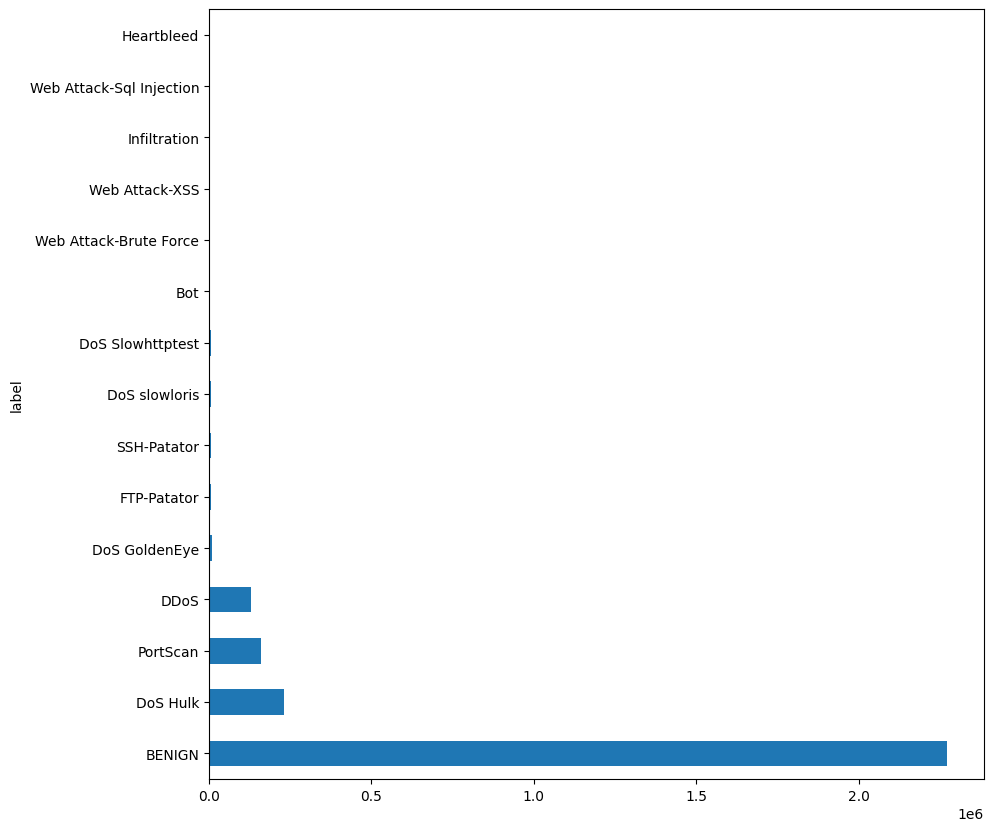

In [14]:
# plot histogram of the label column
dataframe['label'].value_counts().plot(kind='barh', figsize=(10, 10))
plt.show()

Balance the dataset and plot the histogram of the label column

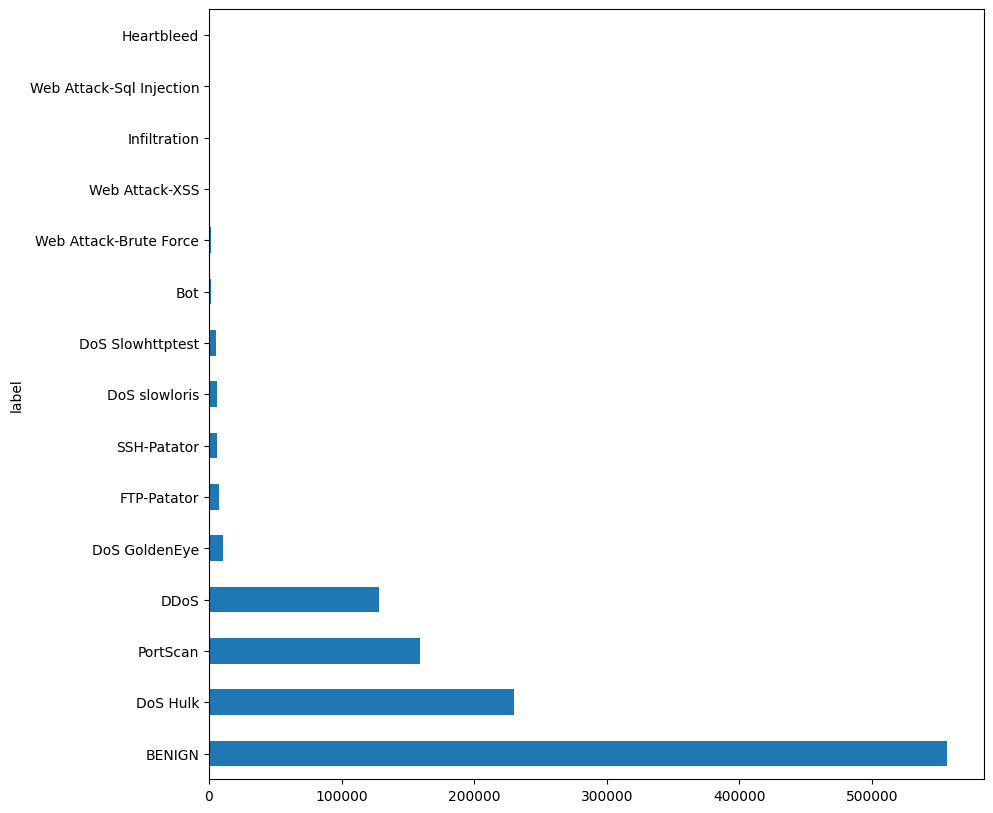

In [15]:
# balance the dataset
# separate the majority and minority classes
majority_class = dataframe[dataframe['label'] == 'BENIGN']
minority_class = dataframe[dataframe['label'] != 'BENIGN']

# downsample the majority class
majority_downsampled = majority_class.sample(n=len(minority_class), random_state=42)

# combine the downsampled majority class with the minority class
dataframe = pd.concat([majority_downsampled, minority_class])

# plot histogram of the label column
dataframe['label'].value_counts().plot(kind='barh', figsize=(10, 10))
plt.show()

In [16]:
# print the shape of the dataframe
print(dataframe.shape)

(1113112, 79)


## Ciciot2023

Load the dataset from disk and remove the rows with missing values and infinity values

In [ ]:
# load the datset "C:/Users/diges/Desktop/dataset/prova"
directory = "C:/Users/diges/Desktop/dataset/prova"
file_path = []

# search for all the csv files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path.append(os.path.join(directory, filename))

# create a dataframe for each csv file
df = []
for file in file_path:
    df.append(pd.read_csv(file))

# concatenate all the dataframes
dataframe = pd.concat(df, ignore_index=True)  # ignore_index=True is needed to reset the index of the dataframe

# convert the label column to int64
label_encoder = LabelEncoder()  # create a label encoder
dataframe['label'] = label_encoder.fit_transform(dataframe['label'])  # encode the labels

# remove the rows with missing values
dataframe = dataframe.dropna()

Print the first 5 rows of the dataframe, shape of the dataframe, and the columns of the dataframe

In [ ]:
# print the first 5 rows of the dataframe
print(dataframe.head())

# print the shape of the dataframe
print(dataframe.shape)

# print the columns of the dataframe
print(dataframe.columns)